In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fit_functions import *
from scipy.special import jv

%matplotlib inline

In [2]:
def _voigt(x,lor,sig,mean=0,n=1,c=0): #lor = hwhm, sigma = gaussian stdev
    z= ((x-mean) + 1j*lor)/(sig*np.sqrt(2))
    value = n*np.real(wofz(z))/(sig*np.sqrt(2*np.pi))+c
    return value

def voigtWidth(lor_fwhm,gauss_sig):
    gauss_fwhm = gauss_sig *2*np.sqrt(2*np.log(2))
    voigt_fwhm = 0.5346*lor_fwhm + np.sqrt(0.2166*lor_fwhm**2 + gauss_fwhm**2)
    return voigt_fwhm

def findNearestIdx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def lorentzian(x,lor): #lor = hwhm
    f = 1/np.pi * lor/(x**2 + lor**2)
    return f

def gaussian(x,sig):
    f = 1/np.sqrt(2*np.pi*sig**2)*np.exp(-x**2/(2*sig**2))
    return f

def findFWHM(x,data):
    half_max = data.max()/2
    idx_max = np.argmax(data)
    data_L = data[0:idx_max]
    x_L = x[0:idx_max]
    data_R = data[idx_max:]
    x_R = x[idx_max:]
    half_L = x_L[findNearestIdx(data_L,half_max)]
    half_R = x_R[findNearestIdx(data_R,half_max)]
    FWHM = abs(half_R-half_L)
    return FWHM
    

Some calculations for the 3P1 transition in Yb:

0.826530612244898


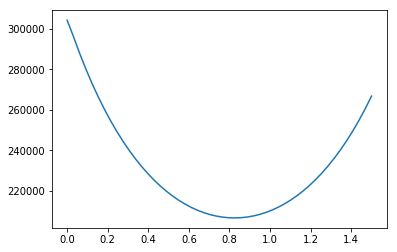

In [151]:
x = np.linspace(0,1.50)
def _f(x):
    f = 200000*(50000*jv(0,x)**2 + 50000*jv(1,x)**2 - np.sqrt(32761*jv(0,x)**4 + 9999934478*jv(1,x)**2 *jv(0,x)**2 + 32761*jv(1,x)**4))/(32761*(jv(0,x)**4 - 2*jv(1,x)**2 *jv(0,x)**2 + jv(1,x)**4))
    return f
plt.plot(x,_f(x))
print(x[_f(x).argmin()])

In [27]:
tau = 0.875 #in us. 0.875 us for 3P1, 14.7 s for 3P2
wavelength = 555.8 #in nm. 555.8 nm for 3p1, 507.4 nm for 3p2
I_s = 2.080201*10**7/(wavelength)**3/tau
print('Saturation Intensity is {} mW/cm^2'.format(I_s))
P= np.linspace(0,1000, num=1000)
diameter = 0.3 #cm
I = 2*P/(np.pi*(diameter/2)**2)
s = I/I_s
gamma = 1/tau #in MHz*2pi
lor_hwhm = gamma*np.sqrt(1+s)/2
doppler_conversion = 43433.3 #MHz*2pi/sqrt(K)*nm
T=6 #kelvin
gauss_sig = doppler_conversion *np.sqrt(T)/wavelength
print('Doppler FWHM = {} MHz'.format(2*np.sqrt(2*np.log(2))*gauss_sig/(np.pi*2)))
print('Power Broadened FWHM at Max Power= {} MHz'.format(lor_hwhm[-1]/np.pi))

Ne_3P1 = np.pi*(s/4)/np.sqrt(1+s)*gamma * _voigt(0,lor_hwhm,gauss_sig)

Saturation Intensity is 0.13846551345538796 mW/cm^2
Doppler FWHM = 71.73940429690424 MHz
Power Broadened FWHM at Max Power= 82.22258632837796 MHz


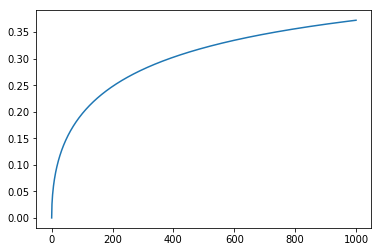

In [28]:
plt.figure()
plt.plot(P,Ne_3P1)

In [122]:
freqMHz = np.linspace(-1000,1000,num=100000)
w=[]
for lor in lor_hwhm:
    w.append(findFWHM(freqMHz,_voigt(freqMHz,lor/(np.pi*2),gauss_sig/(np.pi*2))))

Text(0.5, 0, 'Saturation s')

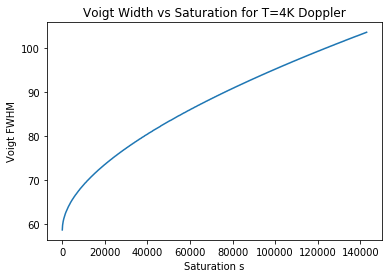

In [126]:
plt.plot(s,w)
plt.title('Voigt Width vs Saturation for T=4K Doppler')
plt.ylabel('Voigt FWHM')
plt.xlabel('Saturation s')

Voigt FWHM = 96.15961596159616 MHz


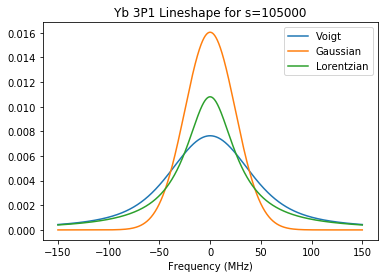

In [138]:
s = 105000
lorMHz = gamma*np.sqrt(1+s)/2/(2*np.pi)
gaussMHz = gauss_sig/(2*np.pi)
freqMHz = np.linspace(-150,150,num=10000)
plt.plot(freqMHz,_voigt(freqMHz,lorMHz,gaussMHz),label='Voigt')
plt.plot(freqMHz,gaussian(freqMHz,gaussMHz),label='Gaussian')
plt.plot(freqMHz,lorentzian(freqMHz,lorMHz),label='Lorentzian')
plt.xlabel('Frequency (MHz)')
plt.title('Yb 3P1 Lineshape for s={}'.format(s))
plt.legend(loc='best')
print('Voigt FWHM = {} MHz'.format(findFWHM(freqMHz,_voigt(freqMHz,lorMHz,gaussMHz))))

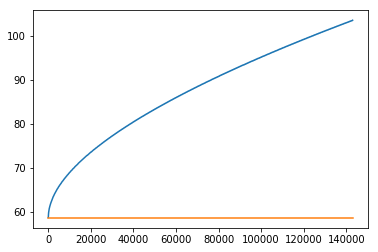

In [79]:
plt.plot(s,np.array(w)/(2*np.pi))
plt.plot(s,np.zeros(len(s))+2*np.sqrt(2*np.log(2))*gauss_sig/(np.pi*2))

In [155]:
tau = 0.875 #in us. 0.875 us for 3P1, 14.7 s for 3P2
wavelength = 555.8 #in nm. 555.8 nm for 3p1, 507.4 nm for 3p2
I_s = 2.080201*10**7/(wavelength)**3/tau
P= np.linspace(0,700, num=1000)
diameter = 0.3 #cm
I = 2*P/(np.pi*(diameter/2)**2)
m = 1
s0 = (jv(0,m)**2)*I/I_s
s1 = (jv(1,m)**2)*I/I_s
gamma = 1/tau #in MHz*2pi
lor_hwhm0 = gamma*np.sqrt(1+s0)/2
lor_hwhm1 = gamma*np.sqrt(1+s0)/2
doppler_conversion = 43433.3 #MHz*2pi/sqrt(K)*nm
T=4 #kelvin
gauss_sig = doppler_conversion *np.sqrt(T)/wavelength
detuning = 2*np.pi*50 #MHz
print('Doppler FWHM = {} MHz'.format(2*np.sqrt(2*np.log(2))*gauss_sig/(np.pi*2)))
print('Power Broadened FWHM for carrier at Max Power= {} MHz'.format(lor_hwhm0[-1]/np.pi))

def Ne_EOM(m,detuning):
    s0 = (jv(0,m)**2)*I/I_s
    s1 = (jv(1,m)**2)*I/I_s
    Ne_3P1_EOM = np.pi*(s0/4)/np.sqrt(1+s0)*gamma * _voigt(0,lor_hwhm0,gauss_sig) + 2*np.pi*(s1/4)/np.sqrt(1+s1)*gamma * _voigt(detuning,lor_hwhm1,gauss_sig)
    return Ne_3P1_EOM

Doppler FWHM = 58.574978326214136 MHz
Power Broadened FWHM for carrier at Max Power= 52.63993348685165 MHz


Text(0, 0.5, 'N excited')

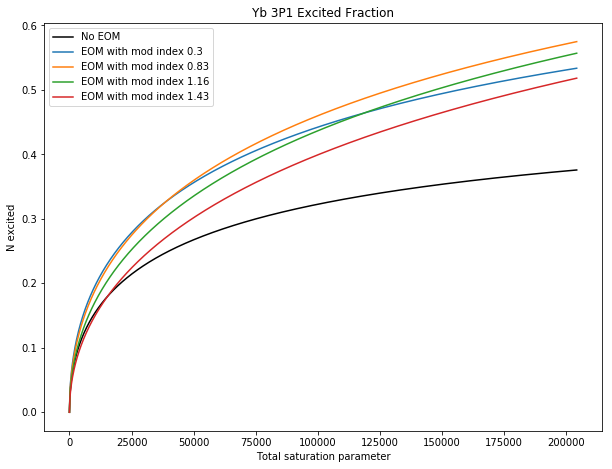

In [154]:
mod = [0.3,0.83,1.16,1.43]
plt.figure(figsize=(10,7.5))
plt.plot(I/I_s,Ne_3P1,label='No EOM',color='black')
for _mod in mod:
    plt.plot(I/I_s,Ne_EOM(_mod,2*np.pi*50),label='EOM with mod index {}'.format(_mod))
plt.legend(loc='best')
plt.title('Yb 3P1 Excited Fraction')
plt.xlabel('Total saturation parameter')
plt.ylabel('N excited')

In [102]:
tau = 0.875 #in us. 0.875 us for 3P1, 14.7 s for 3P2
wavelength = 555.8 #in nm. 555.8 nm for 3p1, 507.4 nm for 3p2
I_s = 2.080201*10**7/(wavelength)**3/tau
P= np.linspace(0,1000, num=1000)
diameter = 0.3 #cm
I = 2*P/(np.pi*(diameter/2)**2)
s = I/I_s
gamma = 1/tau #in MHz*2pi
lor_hwhm = gamma*np.sqrt(1+s)/2
doppler_conversion = 43433.3 #MHz*2pi/sqrt(K)*nm
T=4 #kelvin
gauss_sig = doppler_conversion *np.sqrt(T)/wavelength
print('Doppler FWHM = {} MHz'.format(2*np.sqrt(2*np.log(2))*gauss_sig/(np.pi*2)))
print('Power Broadened FWHM at Max Power= {} MHz'.format(lor_hwhm[-1]/np.pi))
xi = gamma/voigtWidth(lor_hwhm*2,gauss_sig)
Ne_3P1_2 = 6*s/((1/xi)+8*s)
Ne_3P1_3 = s/2/((1/xi)+s)

Doppler FWHM = 58.574978326214136 MHz
Power Broadened FWHM at Max Power= 82.22258632837796 MHz


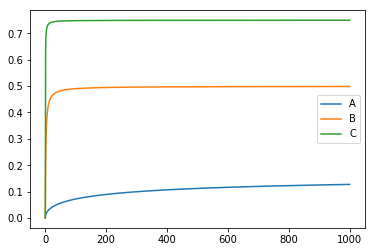

In [107]:
plt.figure()
plt.plot(P,Ne_3P1,label='A')
plt.plot(P,Ne_3P1_3,label='B')
plt.plot(P,Ne_3P1_2,label='C')
plt.legend(loc='best')

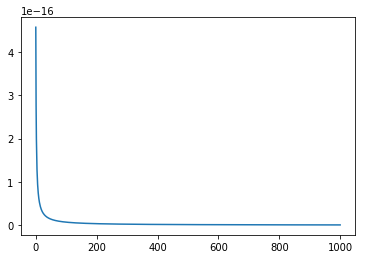

In [105]:
sig0 = 1.475*10**-13 #m^2
sig = sig0/(1/xi + s)
plt.plot(P,sig)

Now for the 3P2 transition in Yb even

In [57]:
tau = 14.7*10**6 #in us. 0.875 us for 3P1, 14.7 s for 3P2
wavelength = 507.4 #in nm. 555.8 nm for 3p1, 507.4 nm for 3p2
I_s = 2.080201*10**7/(wavelength)**3/tau
P= np.linspace(0,1000, num=1000)
diameter = 0.3 #cm
I = 2*P/(np.pi*(diameter/2)**2)
s = I/I_s
gamma = 1/tau #in MHz*2pi
lor_hwhm = gamma*np.sqrt(1+s)/2
doppler_conversion = 43433.3 #MHz*2pi/sqrt(K)*nm
T=4 #kelvin
gauss_sig = doppler_conversion *np.sqrt(T)/wavelength
print('Doppler FWHM = {} MHz'.format(2*np.sqrt(2*np.log(2))*gauss_sig/(np.pi*2)))
print('Power Broadened FWHM at Max Power= {} MHz'.format(lor_hwhm[-1]/np.pi))

Ne_3P2_even = (s/4)/np.sqrt(1+s)*gamma * _voigt(0,lor_hwhm,gauss_sig)

Doppler FWHM = 64.1623432276504 MHz
Power Broadened FWHM at Max Power= 0.017497794455444835 MHz


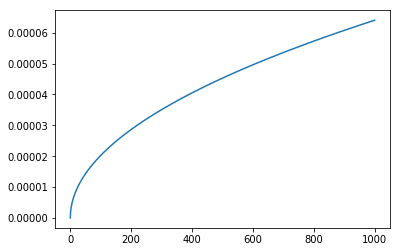

In [58]:
plt.figure()
plt.plot(P,Ne_3P2_even)

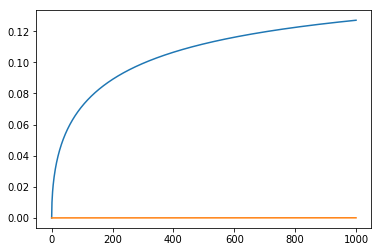

In [59]:
plt.figure()
plt.plot(P,Ne_3P1)
plt.plot(P,Ne_3P2_even)

Is it any better in Yb odd?

In [63]:
tau = 8.7*10**6 #in us. 0.875 us for 3P1, 14.7 s for 3P2
wavelength = 507.4 #in nm. 555.8 nm for 3p1, 507.4 nm for 3p2
I_s = 2.080201*10**7/(wavelength)**3/tau
P= np.linspace(0,1000, num=1000)
diameter = 0.3 #cm
I = 2*P/(np.pi*(diameter/2)**2)
s = I/I_s
gamma = 1/tau #in MHz*2pi
lor_hwhm = gamma*np.sqrt(1+s)/2
doppler_conversion = 43433.3 #MHz*2pi/sqrt(K)*nm
T=4 #kelvin
gauss_sig = doppler_conversion *np.sqrt(T)/wavelength
print('Doppler FWHM = {} MHz'.format(2*np.sqrt(2*np.log(2))*gauss_sig/(np.pi*2)))
print('Power Broadened FWHM at Max Power= {} MHz'.format(lor_hwhm[-1]/np.pi))

Ne_3P2_odd = (s/4)/np.sqrt(1+s)*gamma * _voigt(0,lor_hwhm,gauss_sig)

Doppler FWHM = 64.1623432276504 MHz
Power Broadened FWHM at Max Power= 0.022744812011297598 MHz


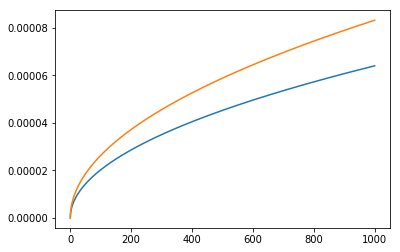

In [61]:
plt.figure()
plt.plot(P,Ne_3P2_even)
plt.plot(P,Ne_3P2_odd)

What about the 1P1 transition?

In [8]:
tau = 5*10**-3 #in us. 0.875 us for 3P1, 14.7 s for 3P2
wavelength = 399 #in nm. 555.8 nm for 3p1, 507.4 nm for 3p2
I_s = 2.080201*10**7/(wavelength)**3/tau
P= np.linspace(0,100, num=1000)
diameter = 0.3 #cm
I = 2*P/(np.pi*(diameter/2)**2)
s = I/I_s
gamma = 1/tau #in MHz*2pi
lor_hwhm = gamma*np.sqrt(1+s)/2
doppler_conversion = 43433.3 #MHz*2pi/sqrt(K)*nm
T=6 #kelvin
gauss_sig = doppler_conversion *np.sqrt(T)/wavelength
print('Doppler FWHM = {} MHz'.format(2*np.sqrt(2*np.log(2))*gauss_sig/(np.pi*2)))
print('Power Broadened FWHM at Max Power= {} MHz'.format(lor_hwhm[-1]/np.pi))

Ne_1P1 = np.pi*(s/4)/np.sqrt(1+s)*gamma * _voigt(0,lor_hwhm,gauss_sig)

Doppler FWHM = 99.93173159954729 MHz
Power Broadened FWHM at Max Power= 211.6215628687012 MHz


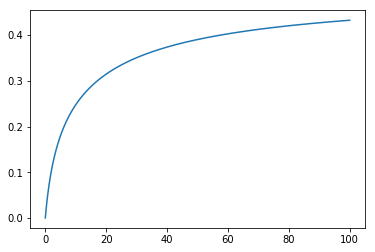

In [9]:
plt.figure()
plt.plot(P,Ne_1P1)

In [29]:
tau = 0.460 #in us. 0.875 us for 3P1, 14.7 s for 3P2
wavelength = 404 #in nm. 555.8 nm for 3p1, 507.4 nm for 3p2
I_s = 2.080201*10**7/(wavelength)**3/tau
print('Saturation Intensity is {} mW/cm^2'.format(I_s))
P= np.linspace(0,1000, num=1000)
diameter = 0.3 #cm
I = 2*P/(np.pi*(diameter/2)**2)
s = I/I_s
gamma = 1/tau #in MHz*2pi
lor_hwhm = gamma*np.sqrt(1+s)/2
doppler_conversion = 43433.3 #MHz*2pi/sqrt(K)*nm
T=6 #kelvin
gauss_sig = doppler_conversion *np.sqrt(T)/wavelength
print('Doppler FWHM = {} MHz'.format(2*np.sqrt(2*np.log(2))*gauss_sig/(np.pi*2)))
print('Power Broadened FWHM at Max Power= {} MHz'.format(lor_hwhm[-1]/np.pi))

Ne_3D2 = np.pi*(s/4)/np.sqrt(1+s)*gamma * _voigt(0,lor_hwhm,gauss_sig)

Saturation Intensity is 0.6858093058115605 mW/cm^2
Doppler FWHM = 98.69495274311726 MHz
Power Broadened FWHM at Max Power= 70.27723703055584 MHz


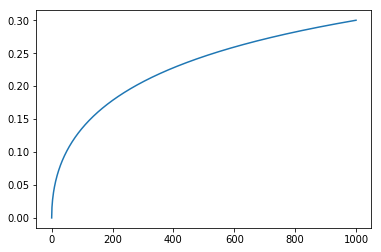

In [30]:
plt.figure()
plt.plot(P,Ne_3D2)